In [14]:
import numpy as np
import pandas as pd
import geopandas as gp
import shapely as shp
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
!curl -O "https://data.cityofnewyork.us/resource/i69b-3rdj.json"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6737k    0 6737k    0     0  5786k      0 --:--:--  0:00:01 --:--:-- 7762k


In [11]:
shape_path = "2010 Census Tracts.geojson"
ct_shape = gp.read_file(shape_path)
ct_shape.head()

,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
0,5,5000900,Staten Island,I,000900,9,(POLYGON ((-74.07920577013245 40.6434307837456...,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.01679376
1,5,5007400,Staten Island,I,007400,74,(POLYGON ((-74.05974734759452 40.5938486115672...,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.79601,9902.94847281
2,1,1003200,Manhattan,I,003200,32,(POLYGON ((-73.97990650235904 40.7268657730023...,MN22,East Village,3809,2334190.23228,6358.38668446
3,1,1009800,Manhattan,I,009800,98,(POLYGON ((-73.96432543478758 40.7563815309909...,MN19,Turtle Bay-East Midtown,3808,1906016.35002,5534.19981063
4,1,1010000,Manhattan,I,010000,100,(POLYGON ((-73.96802436915851 40.7595781400528...,MN19,Turtle Bay-East Midtown,3808,1860938.37721,5692.16873705


In [56]:
ct_shape_bk = ct_shape[ct_shape.boro_code == '3']
ct_shape_bk.head()

,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
29,3,3000501,Brooklyn,I,000501,5.01,(POLYGON ((-73.99301822153384 40.6974623645668...,BK09,Brooklyn Heights-Cobble Hill,4004,901506.992481,4828.17004215
30,3,3002000,Brooklyn,E,002000,20,(POLYGON ((-74.01266264860631 40.6492555547815...,BK32,Sunset Park West,4012,1620770.16274,5426.06727936
31,3,3004100,Brooklyn,I,004100,41,(POLYGON ((-73.98181677448231 40.6873298027649...,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,1744094.3952,5283.85665969
32,3,3005201,Brooklyn,E,005201,52.01,(POLYGON ((-74.0346006153585 40.62200073904816...,BK31,Bay Ridge,4013,1448244.16819,5520.04789788
33,3,3005202,Brooklyn,I,005202,52.02,(POLYGON ((-74.03543728497804 40.6199558076422...,BK31,Bay Ridge,4013,1398134.48416,5190.71390848


In [150]:
cusp = shp.geometry.Point([-73.9866365,40.6931259])

indx = -1
for tract in ct_shape_bk.geometry:
    indx +=1
    if shp.geometry.asShape(tract).contains(cusp):
        print 'CUSP is contained in', tract.envelope
        break
        
# print index
# print ct_shape_bk.iloc[[indx]]

CUSP is contained in POLYGON ((-73.99097186899587 40.69066661360505, -73.9851430608965 40.69066661360505, -73.9851430608965 40.69507576478846, -73.99097186899587 40.69507576478846, -73.99097186899587 40.69066661360505))


In [130]:
ct_bk_reduced = ct_shape_bk[(ct_shape_bk.index % 10) == 0]
ct_bk_reduced.head()

,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
30,3,3002000,Brooklyn,E,002000,20,(POLYGON ((-74.01266264860631 40.6492555547815...,BK32,Sunset Park West,4012,1620770.16274,5426.06727936
40,3,3007600,Brooklyn,E,007600,76,(POLYGON ((-74.01148370452388 40.6439866134074...,BK32,Sunset Park West,4012,1510401.67828,4980.0475141
50,3,3012100,Brooklyn,I,012100,121,(POLYGON ((-73.98771576044813 40.6715553811487...,BK37,Park Slope-Gowanus,4005,1593259.40713,5142.25543344
60,3,3015500,Brooklyn,I,015500,155,(POLYGON ((-73.97519616956251 40.6705761415670...,BK37,Park Slope-Gowanus,4005,1610814.53019,5181.35151603
70,3,3019500,Brooklyn,E,019500,195,(POLYGON ((-73.96518769032984 40.6897823573327...,BK69,Clinton Hill,4004,1475082.70783,4887.71710681


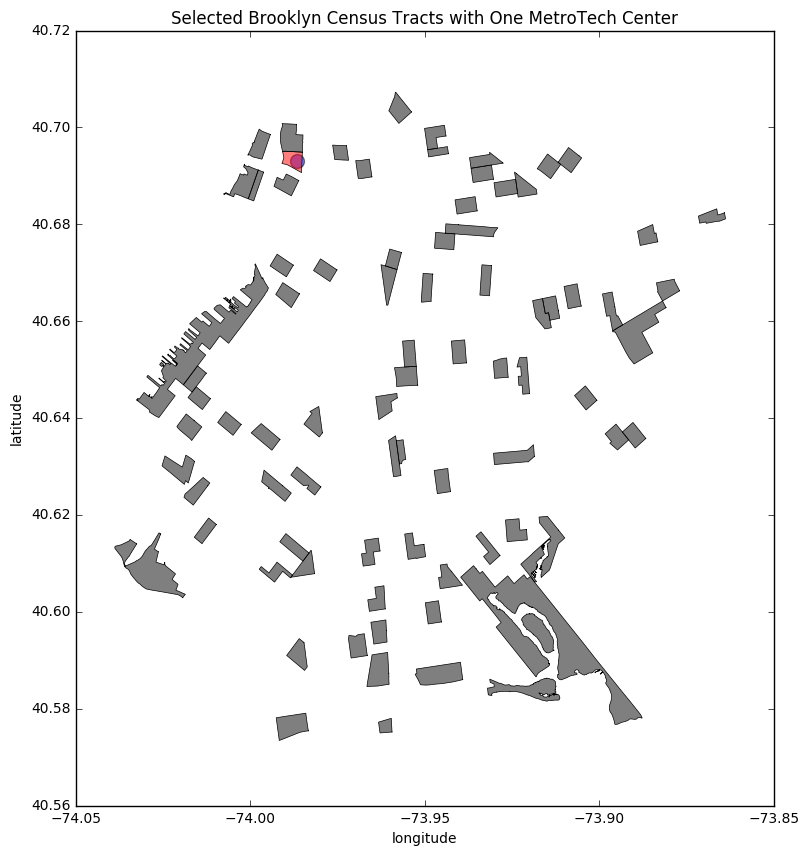

In [153]:
f, ax = plt.subplots(figsize=(9,10))
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
ct_bk_reduced.plot(linewidth=0.5, color='k', ax=ax)
ct_shape_bk.iloc[[341]].plot(linewidth=0.5, color='r', ax=ax)
plt.scatter(-73.9866365,40.6931259, s=100, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Selected Brooklyn Census Tracts with One MetroTech Center")

Figure 1: One in 10 Brooklyn census tracts, with the location of One MetroTech shown as a blue dot and it's census tract in red.